In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('csv/data.csv')

In [3]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
df_numeric = df.select_dtypes(include=[np.number]).dropna()  # Drop NaN values

In [5]:
max_threshold = 1e10  # Define a reasonable threshold
df_numeric = df_numeric[(df_numeric < max_threshold).all(axis=1)]

In [6]:
X = df_numeric.drop(columns=["Deaths / 100 Cases"])
y = df_numeric["Deaths / 100 Cases"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [11]:
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.6003
RMSE: 2.4317


C:\Users\Putchik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Putchik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Putchik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Putchik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

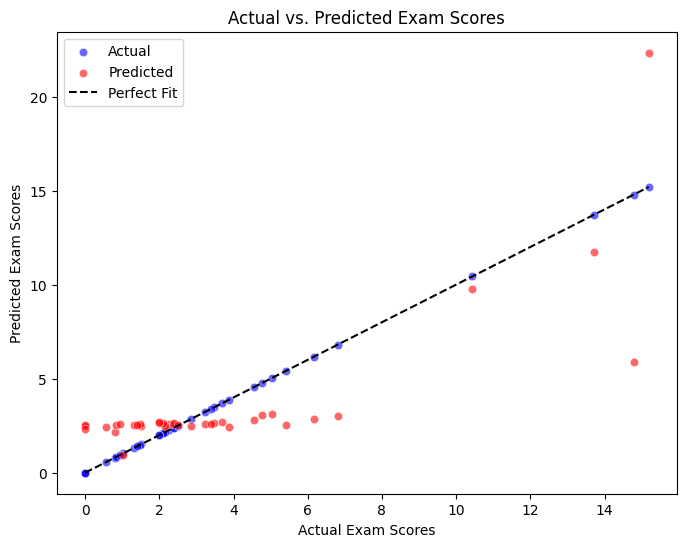

In [15]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values.flatten(), y=y_test.values.flatten(), color="blue", label="Actual", alpha=0.6)  # Actual values
sns.scatterplot(x=y_test.values.flatten(), y=y_pred.flatten(), color="red", label="Predicted", alpha=0.6)  # Predicted values

# Plot a reference diagonal line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="black", linestyle="--", label="Perfect Fit")

# Labels, title, and legend
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs. Predicted Exam Scores")
plt.legend()
plt.show()

In [16]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients)

                        Coefficient
Deaths / 100 Recovered     0.002275
New cases                  0.000373
Deaths                     0.000253
Confirmed                  0.000055
Confirmed last week        0.000033
1 week change              0.000022
Recovered                 -0.000095
Active                    -0.000103
New recovered             -0.000202
New deaths                -0.004913
Recovered / 100 Cases     -0.008040
1 week % increase         -0.013824


In [18]:
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, y_pred)

print(f"R² Score on Training Data: {r2_train:.4f}")
print(f"R² Score on Test Data: {r2_test:.4f}")

R² Score on Training Data: 0.2275
R² Score on Test Data: 0.6003
